In [2]:
#importar biblioteca Pandas
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Juntar os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#alterar o tipo de dados da coluna LOjaID
df["lojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
lojaID            object
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID
0,Aracaju,2018-01-01,142.00,1520,1,1520
1,Aracaju,2018-01-01,14.21,1522,6,1522
2,Aracaju,2018-01-01,71.55,1520,1,1520
3,Aracaju,2018-01-01,3.01,1521,7,1521
4,Aracaju,2018-01-01,24.51,1522,8,1522


In [13]:
#Consultar linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
lojaID    0
dtype: int64

In [14]:
#substituir os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
lojaID    0
dtype: int64

In [17]:
#substituir os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
#Apagar as linhas com valores nulos
df.dropna(inplace=True)

In [19]:
#Apagar as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)


In [20]:
#remover as linhas com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

Criando colunas novas

In [21]:
#Criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08


In [23]:
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08,8.0


In [25]:
#Devolver a maior receita
df["Receita"].max()

3544.0

In [26]:
#Devolver a menor receita
df["Receita"].min()

3.34

In [27]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0


In [29]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,1522,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,981,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,1035,4.57,1.0


In [30]:
#Agrupar por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
#Ordenadno o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,852,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,852,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,852,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,854,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,854,3112.0,4.0


## **Trabalhando com datas**

In [32]:
#Transformar a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [33]:
#verificar o tipo de dados em cada coluna
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID               int64
Qtde                 int64
lojaID              object
Receita            float64
Receitas/Vendas    float64
dtype: object

In [34]:
#Transformando a coluna data em data
df["Data"] = pd.to_datetime(df["Data"])

In [35]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                      int64
Qtde                        int64
lojaID                     object
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [37]:
#reagrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [38]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas,Ano_Venda
108,Fortaleza,2019-03-02,152.89,981,4,981,611.56,4.0,2019
32,Salvador,2019-01-01,151.27,1035,1,1035,151.27,1.0,2019
239,Salvador,2019-01-03,161.41,1037,3,1037,484.23,3.0,2019
67,Natal,2019-02-14,379.00,852,2,852,758.00,2.0,2019
123,Natal,2019-01-02,127.45,1036,3,1036,382.35,3.0,2019


In [40]:
#extrair o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
75,Recife,2019-01-01,170.29,981,8,981,1362.32,8.0,2019,1,1
88,Salvador,2019-01-01,31.20,1036,1,1036,31.20,1.0,2019,1,1
56,Recife,2019-01-01,7.98,983,5,983,39.90,5.0,2019,1,1
159,Natal,2019-01-02,172.52,1035,1,1035,172.52,1.0,2019,1,2
49,Recife,2019-01-01,122.55,981,1,981,122.55,1.0,2019,1,1


In [42]:
#retornar a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
#calcular a difernca em dias
df["diferenca_dias"] = df["Data"] -df["Data"].min()

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
222,Natal,2019-01-02,43.96,1037,1,1037,43.96,1.0,2019,1,2,366 days
73,Recife,2019-01-01,39.71,981,5,981,198.55,5.0,2019,1,1,365 days
100,Aracaju,2018-01-01,180.57,1520,6,1520,1083.42,6.0,2018,1,1,0 days
138,Salvador,2019-03-02,212.03,1037,3,1037,636.09,3.0,2019,3,2,425 days
23,Natal,2019-02-14,304.00,854,3,854,912.00,3.0,2019,2,14,409 days


In [49]:
#Criar a coluna trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,Trimestre_venda
135,Natal,2019-01-02,9.95,1037,3,1037,29.85,3.0,2019,1,2,366 days,1,1
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55,1.0,2018,1,1,0 days,1,1
141,Salvador,2019-03-02,9.08,1036,1,1036,9.08,1.0,2019,3,2,425 days,1,1
86,Fortaleza,2019-01-01,42.11,1004,3,1004,126.33,3.0,2019,1,1,365 days,1,1
52,Recife,2019-01-01,11.87,981,6,981,71.22,6.0,2019,1,1,365 days,1,1


In [51]:
#Filtrar as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [52]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,Trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,981,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,982,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,983,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,981,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,982,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,1036,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,1037,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,1036,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,1036,41.58,2.0,2019,3,2,425 days,1,1


# **Visualização de Dados**

In [53]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

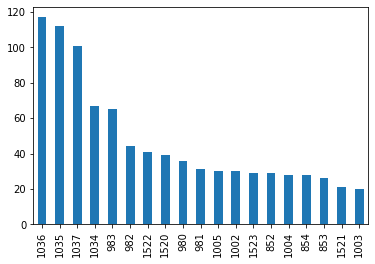

In [55]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

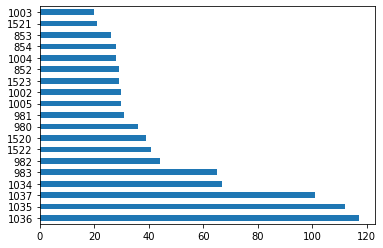

In [56]:
#Gráfico de barras Horizontais
df["LojaID"].value_counts().plot.barh()

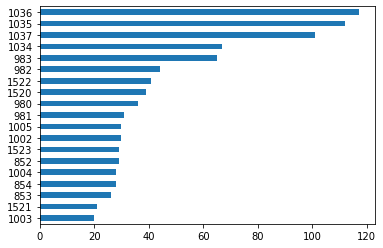

In [57]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=True).plot.barh()

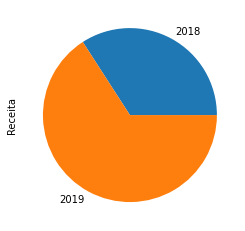

In [61]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie(); #; retira a linha <matplotlib>

In [60]:
#Totral vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

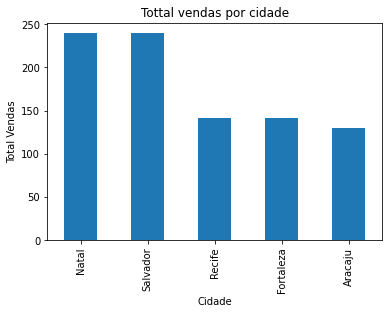

In [62]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Tottal vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

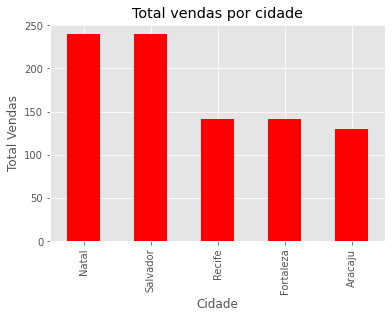

In [65]:
#alterar cor 
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [64]:
#alterar o estilo
plt.style.use("ggplot")

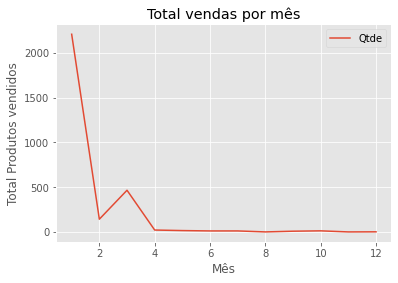

In [71]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total vendas por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()

In [69]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [75]:
#Selecionar apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

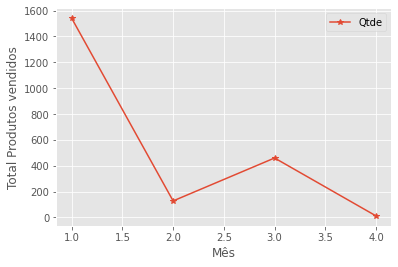

In [78]:
#Total de vendas por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()

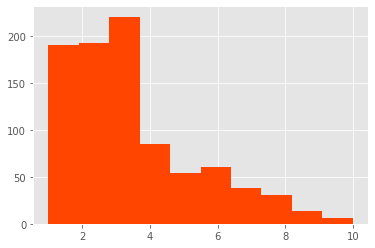

In [79]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

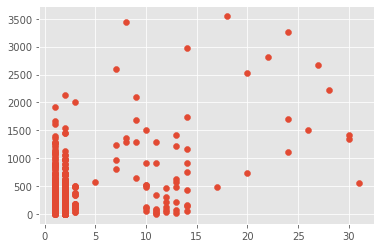

In [80]:
plt.scatter(x=df_2019["dia_venda"], y= df_2019["Receita"]);

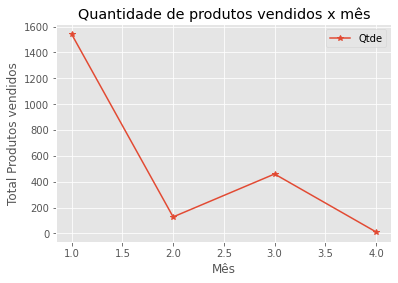

In [81]:
#salvar como png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")